# 1. Jeux de données 

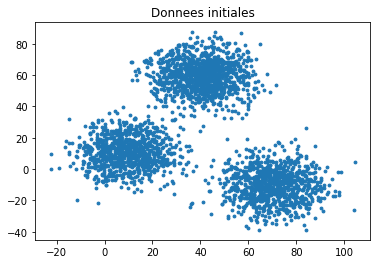

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import arff 

#Parser un fichier de donnees au format arff
#data est un tableau d'exemples avec pour chacun
#la liste des valeurs des features 
#
#Dans les jeux de donnees consideres : 
# il y a 2 features (dimension 2)
#Ex : [[-0.499261,]-0.0612356],
#      [-1.51369, 0.265446],
#      [-1.60321, 0.362039],....
#      ]
#
#Nolte : chauqe exemple du jeu de donnees contient aussi un 
#numero de cluster. On retire cette information

path='./artificial/'
databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage en 2D
#Extraire chaque valeur de features pour en faire une liste
#Ex pour f0 = [-0.499261, -1.51369, -1.60321, ...]
#Ex pour f0 = [-0.0612356, 0.265446, 0.362039, ...]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8) #s= : taille des points sur le graphique
plt.title("Donnees initiales")
plt.show()

# 2. Clustering k-Means et k-Medoids

## 2.1 Pour démarrer

Appel KMeans pour une valeur fixee de k


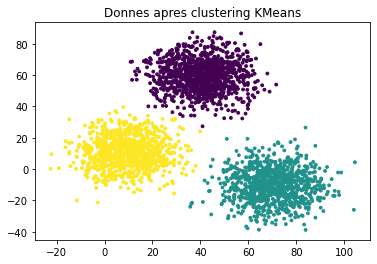

nb clusters = 3 , nb iter = 3 , runtime =  40.73 ms


In [2]:
import time 

from sklearn import cluster 

#Les donnes sont dans datanp (2 dimensions)
#f0 : vaeurs sur le premiere dimension
#f1 : valeurs sur la deuxieme dimension

print("Appel KMeans pour une valeur fixee de k")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++')
model.fit(data)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

## 2.2 Intérêts de la méthode k-Means  

indice de DB : 0.6669360027929133
indice de silhouette : 0.5233926629564977


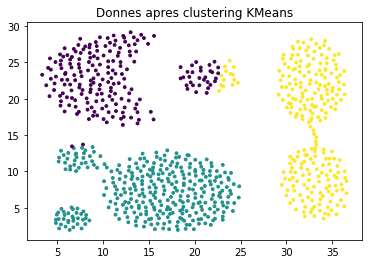

nb iter = 9 , runtime =  48.22 ms


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#load un dataset
databrut2 = arff.loadarff(open(path+"aggregation.arff", 'r'))
data2 = [[x[0],x[1]] for x in databrut2[0]]

X = data2
f0 = [f[0] for f in data2]
f1 = [f[1] for f in data2]

tps1 = time.time()
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
tps2 = time.time()
labels = kmeans.labels_
iteration = kmeans.n_iter_

sil=metrics.silhouette_score(X, labels, metric='euclidean')

#Calcul de l'indice de Davies_Bouldin
print("indice de DB :", davies_bouldin_score(X, labels))
print("indice de silhouette :", sil)


plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

## 2.2 Méthode k-medoids

In [6]:
from sklearn import metrics
import kmedoids
from sklearn . metrics . pairwise import euclidean_distances
from sklearn . metrics . pairwise import manhattan_distances
for k in range(2,11):

    tps1 = time . time ()
    distmatrix = manhattan_distances ( data2 )
    fp = kmedoids . fasterpam ( distmatrix , k )
    tps2 = time . time ()
    iter_kmed = fp . n_iter
    labels_kmed = fp . labels
    print("\n///////////////// k = ",k,"/////////////////")
    print ( " Loss with FasterPAM : " , fp . loss )
    sil=metrics.silhouette_score(distmatrix, labels_kmed, metric='manhattan')
    print("indice de DB :", davies_bouldin_score(distmatrix, labels_kmed))
    print("indice de silhouette :", sil)

    #plt . scatter ( f0 , f1 , c = labels_kmed , s = 8 )
    #plt . title ( " Donnees apres clustering KMedoids " )
    #plt . show ()
    print ( " nb clusters = " ,k , " , nb iter = " , iter_kmed , " , runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


///////////////// k =  2 /////////////////
 Loss with FasterPAM :  8811.600000000002
indice de DB : 1.272796420159749
indice de silhouette : 0.3536010335400711
 nb clusters =  2  , nb iter =  3  , runtime =  787.05  ms 

///////////////// k =  3 /////////////////
 Loss with FasterPAM :  5781.949999999998
indice de DB : 0.7427473950666418
indice de silhouette : 0.4922434422218655
 nb clusters =  3  , nb iter =  3  , runtime =  8.01  ms 

///////////////// k =  4 /////////////////
 Loss with FasterPAM :  4788.799999999997
indice de DB : 0.7040111760447494
indice de silhouette : 0.503825025451317
 nb clusters =  4  , nb iter =  3  , runtime =  8.04  ms 

///////////////// k =  5 /////////////////
 Loss with FasterPAM :  6640.500000000001
indice de DB : 1.176945617572439
indice de silhouette : 0.26699913292796273
 nb clusters =  5  , nb iter =  3  , runtime =  3.52  ms 

///////////////// k =  6 /////////////////
 Loss with FasterPAM :  3819.0999999999985
indice de DB : 0.8728519919694929

In [12]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import mutual_info_score 
print("Rand Score : ",rand_score(labels,labels_kmed))
print("Mutual Information : ", mutual_info_score(labels,labels_kmed,contingency=None))


NameError: name 'rand_score' is not defined

# 3. Clustering agglomératif 

## 3.1 Pour démarrer

 Dendrogramme ' single ' donnees initiales 


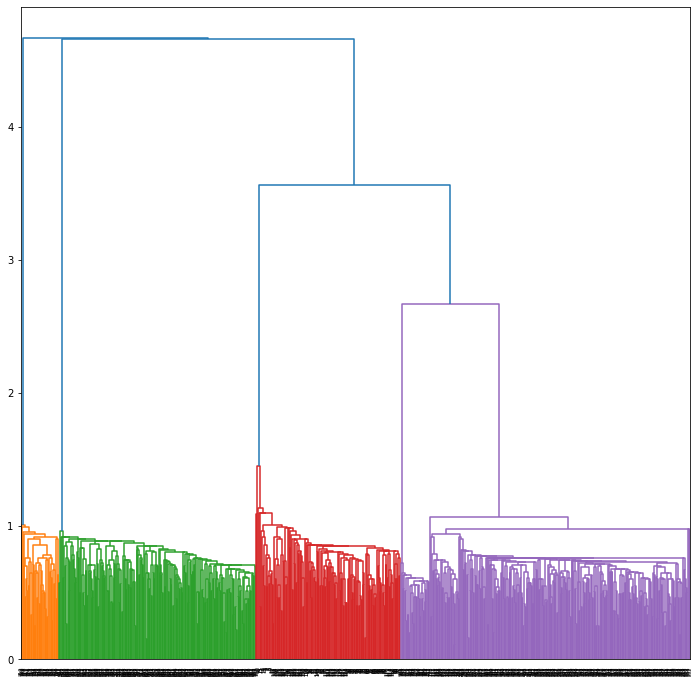

In [13]:
import scipy . cluster . hierarchy as shc
# Donnees dans datanp
print ( " Dendrogramme ' single ' donnees initiales " )
linked_mat = shc . linkage ( data2 , "single")
plt . figure ( figsize = ( 12 , 12 ) )
shc . dendrogram ( linked_mat , orientation = "top" ,
                  distance_sort = "descending" , 
                  show_leaf_counts = False )
plt . show ()

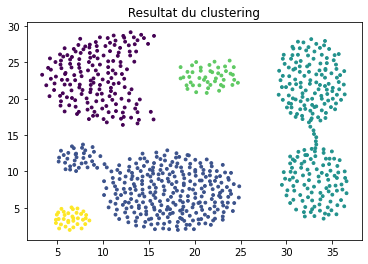

 nb clusters =  5  , nb feuilles =  788  runtime =  13.54  ms 


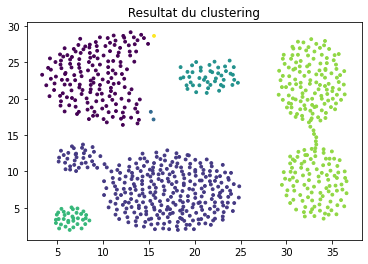

 nb clusters =  7  , nb feuilles =  788  runtime =  7.05  ms 


In [15]:
# set di stance_threshold ( 0 ensures we compute the full tree )
tps1 = time . time ()
model = cluster.AgglomerativeClustering(distance_threshold = 2 , 
                                        linkage = "single" , 
                                        n_clusters = None )
model = model.fit (data2)
tps2 = time.time ()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering " )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves ,
       " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

# set the number of clusters
k = 7
tps1 = time . time ()
model = cluster.AgglomerativeClustering( linkage = "single" , n_clusters = k )
model = model.fit (data2)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering " )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves ,
       " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )


# 3. Clustering Agglomératif

## 3.1 Pour démarrer

Dendrogramme ’single’ donnees initiales


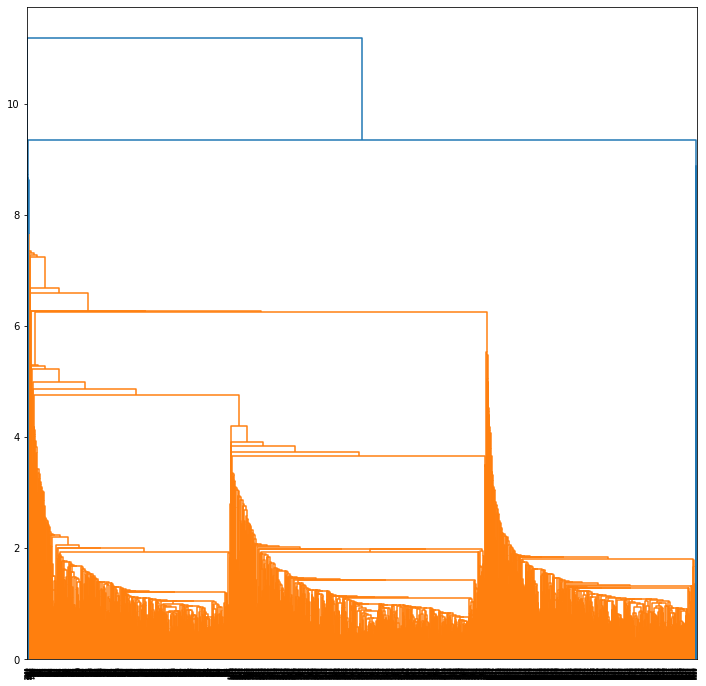

In [20]:
import scipy.cluster.hierarchy as shc 

# Donnees dans datanp
print("Dendrogramme ’single’ donnees initiales") 

linked_mat = shc.linkage(data, 'single')

plt.figure(figsize=(12, 12)) 
shc.dendrogram(linked_mat , 
orientation='top', 
distance_sort='descending', 
show_leaf_counts=False) 

plt.show()

ValueError: 'c' argument has 3000 elements, which is inconsistent with 'x' and 'y' with size 788.

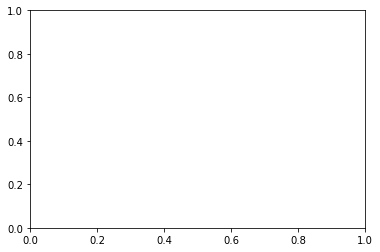

In [30]:
# set distance_threshold (0 ensures we compute the full tree)
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold=10, linkage='single', n_clusters=None)
model = model.fit(data)
tps2 = time.time()

labels = model.labels_
k = model.n_clusters_ 
leaves=model.n_leaves_
# Affichage clustering 
plt.scatter(f0, f1, c=labels, s=8) 
plt.title("Resultat du clustering") 
plt.show()
print("nb clusters =",k,", nb feuilles = ", leaves, " runtime = ", round((tps2 - tps1)*1000,2),"ms")

# set the number of clusters
k=4
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage= 'single', n_clusters=k) 
model = model.fit(data)
tps2 = time.time()

labels = model.labels_ 
kres = model.n_clusters_ 
leaves=model.n_leaves_


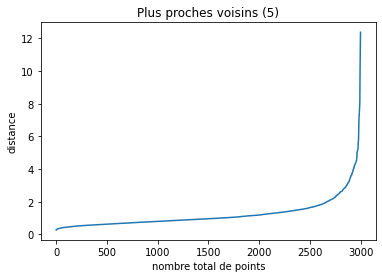

In [33]:
from sklearn import neighbors
# Distances k plus proches voisins
    # Donnees dans X
k=5
neigh = neighbors.NearestNeighbors(n_neighbors = k)
neigh.fit(data)
distances , indices = neigh.kneighbors(data)
    # retirer le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0, distances.shape[0])])
trie = np.sort(newDistances )
plt.title("Plus proches voisins (5)")
plt.xlabel("nombre total de points")
plt.ylabel("distance")
plt.plot(trie)
plt.show()



In [34]:
max_silhouette = 0
MyMinSamples = 0
labels_used = []

tps1 = time.time()

# On calcule les indicateurs de manière itérative (enlever la boucles et fixer j pour le début)

for j in range(0, 15):
    model = cluster.DBSCAN(eps=0.02, min_samples=j) #Paramètres eps et min_samples à modifier
    model.fit(data) 
    my_labels = model.labels_
    if((max(my_labels)+1 > 1 and (max(my_labels)+1<1000)) and (silhouette_score(data, my_labels) > max_silhouette)):
        bestMinSamples = j
        max_silhouette = silhouette_score(data, my_labels)
        labels_used = my_labels 

tps2 = time.time()

# On affiche les résultats qu'on a trouvé

print("eps = ", 0.02)
print("min_samples = ", MyMinSamples)
print("Temps Exec = ", round((tps2-tps1)*1000,2) ,  "ms ")

print("k: ", max(labels_used)+1)

# On affiche le cluster

plt.scatter(f0, f1, c = labels, cmap= "plasma", s=8) # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.title("Clustered Data")
plt.show() # showing the plot

eps =  0.02
min_samples =  0
Temps Exec =  201.42 ms 


ValueError: max() arg is an empty sequence